# Premoddeling Analysis and Preparation

## Import required packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.pylab import rcParams
%matplotlib inline

In [2]:
zill = pd.read_csv('https://mod4finalproject.s3.amazonaws.com/zillow_cleaned_no_nulls.csv', 
                   index_col=0, 
                   dtype = {'zip':'object'})

In [3]:
zill.index = pd.to_datetime(zill.index)
zill.dtypes

regionid        int64
zip            object
city           object
state          object
metro          object
countyname     object
sizerank        int64
value         float64
dtype: object

## Define list of best zip codes
Create new data frame of just these values

In [4]:
zill.loc[(zill.zip == '33404')]

,regionid,zip,city,state,metro,countyname,sizerank,value
date,,,,,,,,
1996-04-01,72571,33404,Riviera Beach,FL,Miami-Fort Lauderdale,Palm Beach,2410,56800.0
1996-05-01,72571,33404,Riviera Beach,FL,Miami-Fort Lauderdale,Palm Beach,2410,56700.0
1996-06-01,72571,33404,Riviera Beach,FL,Miami-Fort Lauderdale,Palm Beach,2410,56600.0
1996-07-01,72571,33404,Riviera Beach,FL,Miami-Fort Lauderdale,Palm Beach,2410,56500.0
1996-08-01,72571,33404,Riviera Beach,FL,Miami-Fort Lauderdale,Palm Beach,2410,56500.0
...,...,...,...,...,...,...,...,...
2017-12-01,72571,33404,Riviera Beach,FL,Miami-Fort Lauderdale,Palm Beach,2410,128500.0
2018-01-01,72571,33404,Riviera Beach,FL,Miami-Fort Lauderdale,Palm Beach,2410,129900.0
2018-02-01,72571,33404,Riviera Beach,FL,Miami-Fort Lauderdale,Palm Beach,2410,130700.0


In [5]:
best_zips = ['33976', '33974', '47353', '71263', '67860']
top_zips = zill.loc[(zill.zip.isin(best_zips))]

In [6]:
kill_cols = ['regionid', 'city', 'state', 'metro', 'countyname', 'sizerank']
top_zips = top_zips.drop(columns = kill_cols)

## Define dataframes of just each zip code's name

In [7]:
eastside = top_zips.loc[(top_zips.zip == '33976')]
chelsea = top_zips.loc[(top_zips.zip == '33974')]
greenwich = top_zips.loc[(top_zips.zip == '47353')]

## Review mean house values over time

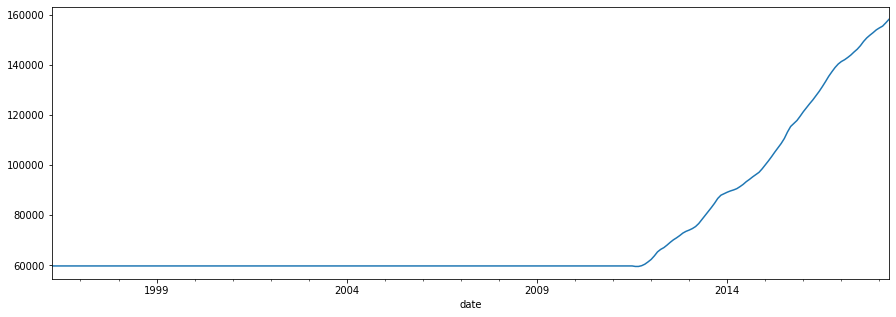

In [8]:
eastside.value.rolling(1).mean().plot(figsize=(15,5));

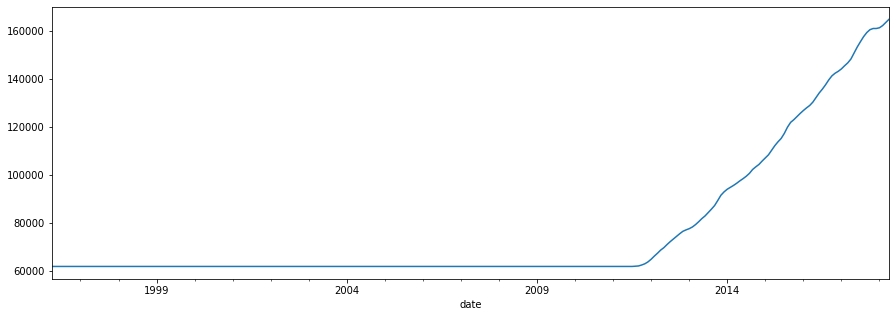

In [9]:
chelsea.value.rolling(1).mean().plot(figsize=(15,5));

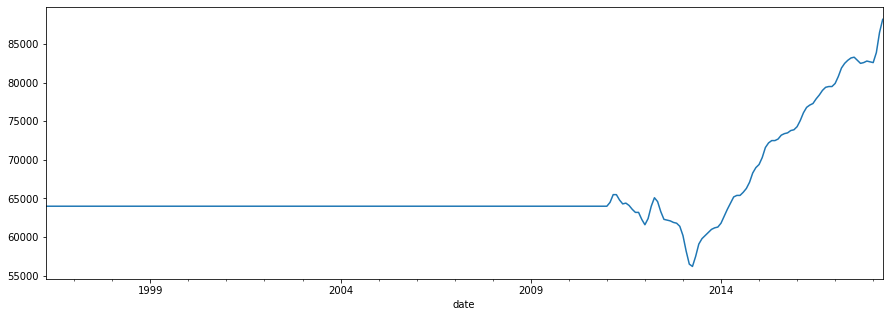

In [10]:
greenwich.value.rolling(1).mean().plot(figsize=(15,5));

## Create and review autocorrilation plots

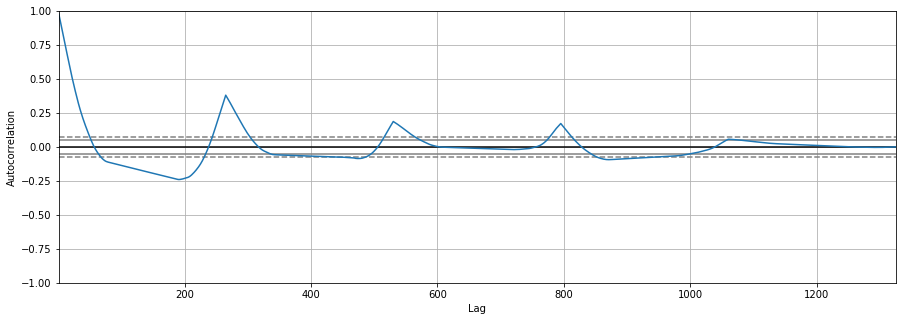

In [11]:
plt.figure(figsize=(15,5))
figure = pd.plotting.autocorrelation_plot(top_zips.value);

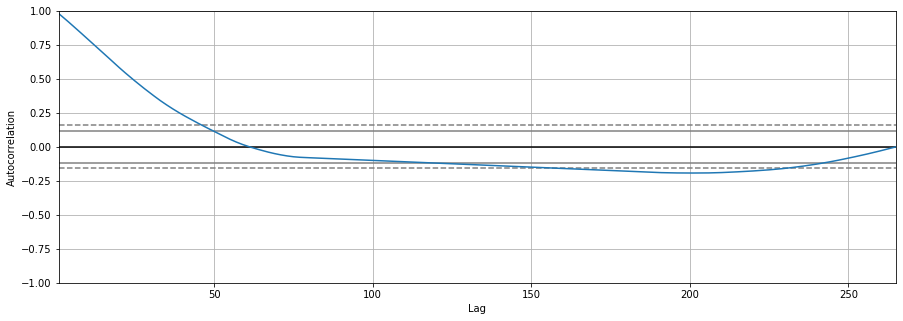

In [12]:
plt.figure(figsize=(15,5))
figure = pd.plotting.autocorrelation_plot(eastside.value);

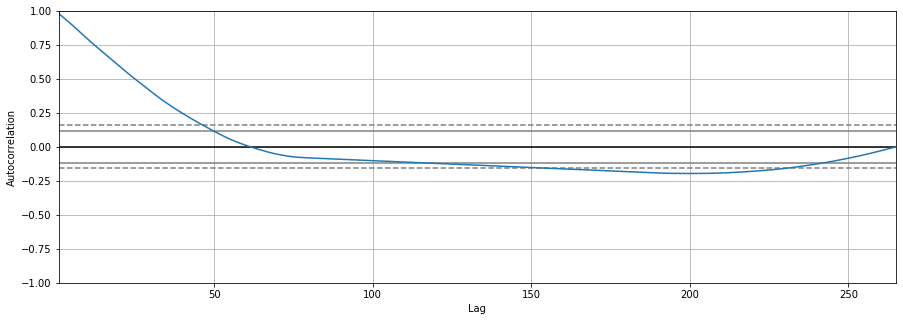

In [13]:
plt.figure(figsize=(15,5))
figure = pd.plotting.autocorrelation_plot(chelsea.value);

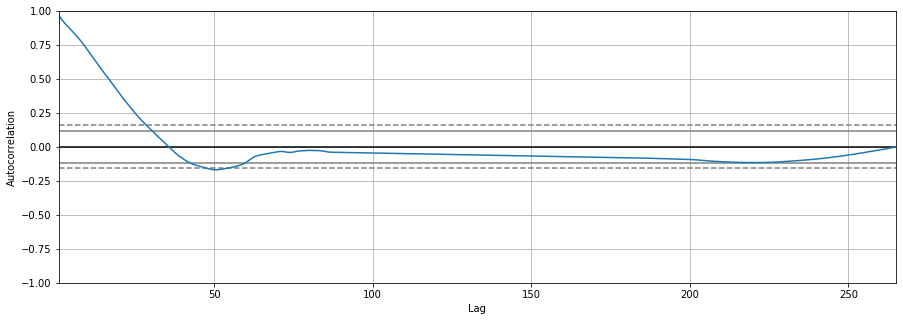

In [14]:
plt.figure(figsize=(15,5))
figure = pd.plotting.autocorrelation_plot(greenwich.value);

## Alternative to pandas' autocorrelaiton

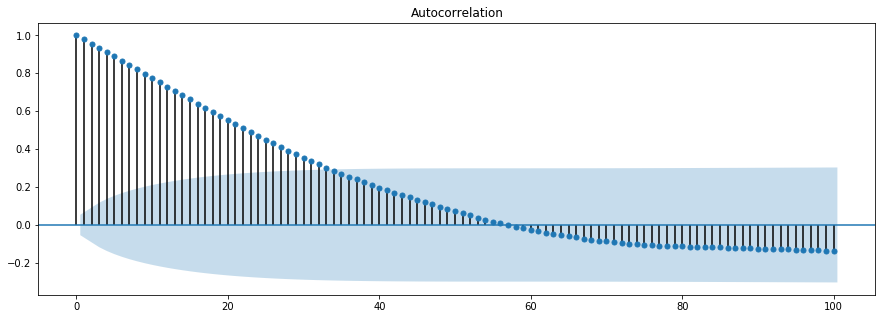

In [15]:
rcParams['figure.figsize'] = 15, 5
plot_acf(top_zips.value, lags=100);

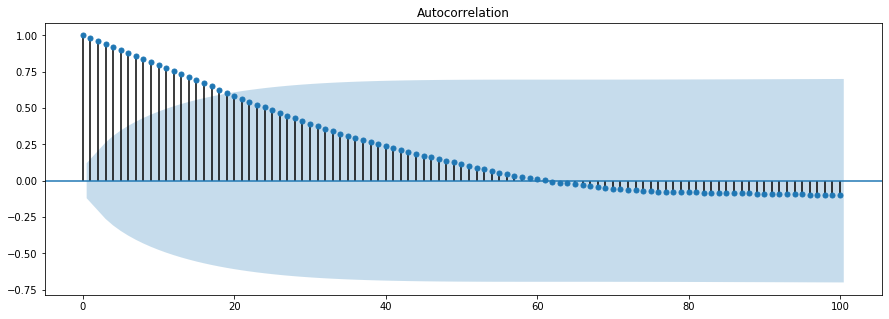

In [16]:
rcParams['figure.figsize'] = 15, 5
plot_acf(eastside.value, lags=100);

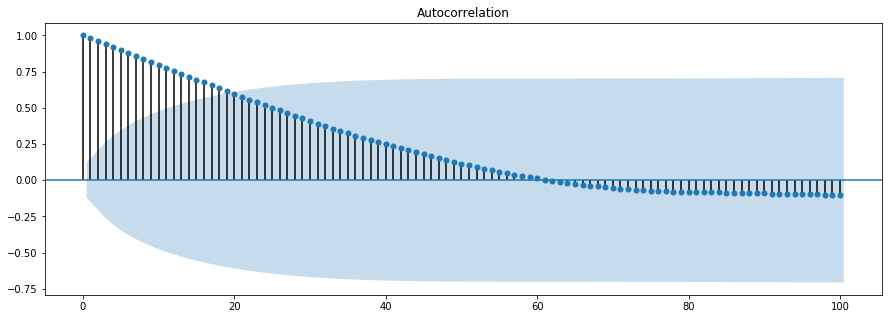

In [17]:
rcParams['figure.figsize'] = 15, 5
plot_acf(chelsea.value, lags=100);

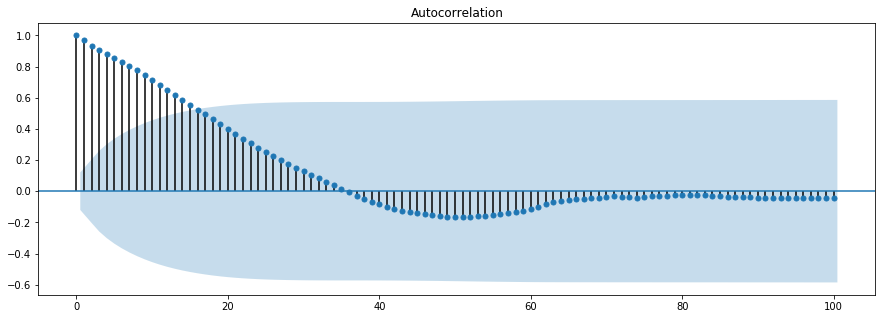

In [18]:
rcParams['figure.figsize'] = 15, 5
plot_acf(greenwich.value, lags=100);

## Plot partial autocorrelation function
Plots currently inlcude dumm lags, better values pending further analysis

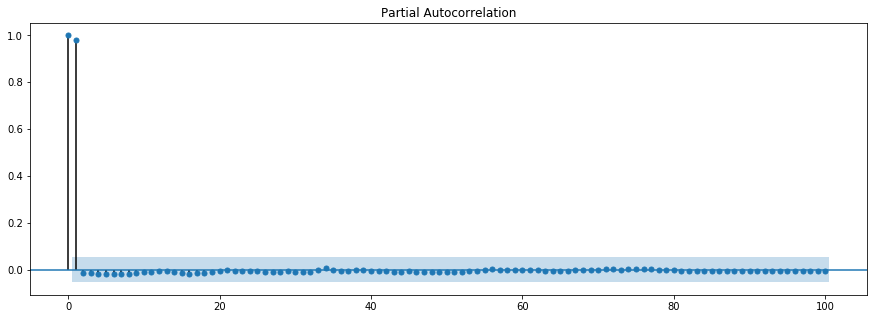

In [19]:
rcParams['figure.figsize'] = 15, 5
plot_pacf(top_zips.value, lags=100);

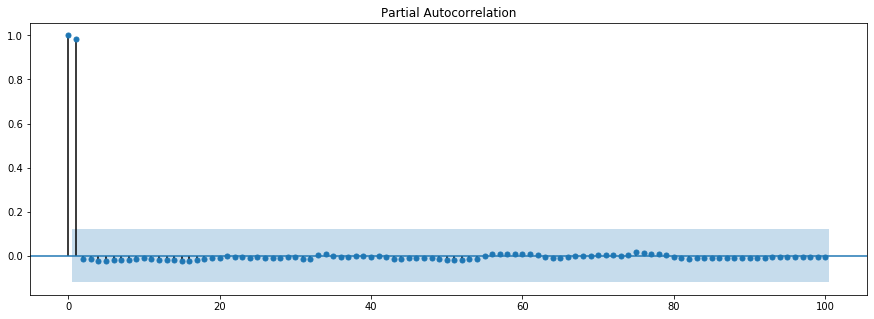

In [20]:
rcParams['figure.figsize'] = 15, 5
plot_pacf(eastside.value, lags=100);

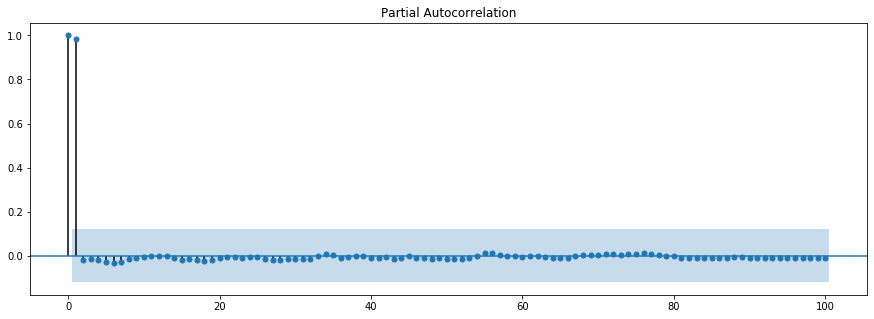

In [21]:
rcParams['figure.figsize'] = 15, 5
plot_pacf(chelsea.value, lags=100);

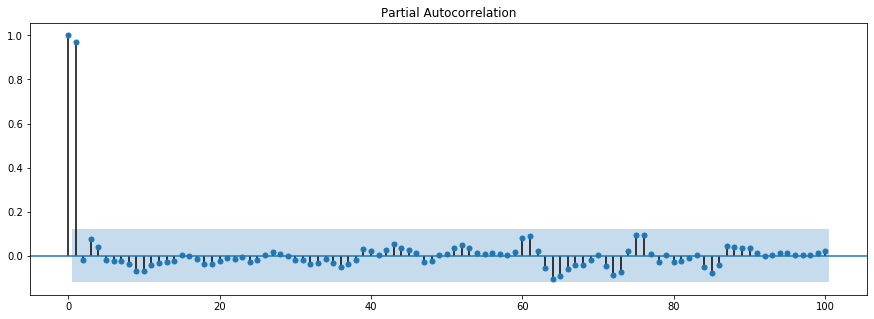

In [22]:
rcParams['figure.figsize'] = 15, 5
plot_pacf(greenwich.value, lags=100);